In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/nlp-2021-vda/evaluate_models/
!pwd

/content/drive/MyDrive/nlp-2021-vda/evaluate_models
/content/drive/MyDrive/nlp-2021-vda/evaluate_models


If you want to run evaluation on our sampled responses, download data from google cloud storage.

In [ ]:
import os
if not os.path.isdir('./sampled_responses'):
    !gsutil -m cp -r gs://nlp-lab/evaluation/sampled_responses ./

In [ ]:
!pip install -U nltk

Requirement already up-to-date: nltk in /usr/local/lib/python3.7/dist-packages (3.6.2)


In [ ]:
!pip install transformers

When nltk.download opens choose 'Download' and as package 'stopwords'. Then 
choose quit.

In [3]:
import json
import nltk
nltk.download()
from nltk.translate.meteor_score import meteor_score
import matplotlib.pyplot as plt
import numpy as np
nltk.download('wordnet')

# Metric calculation 
from data import metrics
from data import parse_sampled_responses
from data import metric_averages_or_ratios

# For plotting
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from plotly.subplots import make_subplots


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# METEOR

Plot METEOR Score vs Training Step and Returns vs Training Step

In [ ]:
path_list = ['supervised_0.7', 'run6_1', 'run6_2', 'run6_3', 'run6_4', 'run6_5', 'run6_6', 'run6_7', 'run6_8']
file_scores = []
gold_path = 'sampled_responses/policy-2/gold.json'

In [ ]:
for path in path_list:
  with open(gold_path) as f:
    gold = json.load(f)

  with open(f"sampled_responses/policy-2/{path}.json") as f:
    data = json.load(f)
  scores = []
  for i in range(len(gold)):
    score = meteor_score([gold[i]['gold_response']], data[i]['sample0'])
    scores.append(score)
  file_scores.append(sum(scores) / len(scores))

In [ ]:
x = [0, 25, 50, 75, 100, 125, 150, 175, 200]
returns = [0.82, 0.92, 2.56, 1.97, 2.84, 2.21, 2.41, 1.94, -0.11]

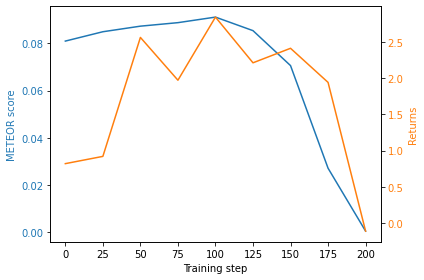

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Training step')
ax1.set_ylabel('METEOR score', color=color)
ax1.plot(x, file_scores, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Returns', color=color)  # we already handled the x-label with ax1
ax2.plot(x, returns, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Calculate METEOR score of training_step=75 model for different values of temperature

In [ ]:
path_list = ['run6_3', 'run6_3_0.5t', 'run6_3_0t']
file_scores = []
gold_path = 'sampled_responses/policy-2/gold.json'

In [ ]:
for path in path_list:
  with open(gold_path) as f:
    gold = json.load(f)

  with open(f"sampled_responses/policy-2/{path}.json") as f:
    data = json.load(f)
  scores = []
  for i in range(len(gold)):
    score = meteor_score([gold[i]['gold_response']], data[i]['sample0'])
    scores.append(score)
  file_scores.append(sum(scores) / len(scores))

In [ ]:
print("Training Step            Temperature                METEOR Score")
print("75                      ", 0.7, "                   ",file_scores[0])
print("75                      ", 0.5, "                   ",file_scores[1])
print("75                      ", 0, "                     ",file_scores[2])

Training Step            Temperature                METEOR Score
75                       0.7                     0.08875240201575094
75                       0.5                     0.090278938654632
75                       0                       0.07949642348868838


# Perplexity

# Utterance length

In [4]:
path_list = ['supervised_0.7', 'run6_1', 'run6_2', 'run6_3', 'run6_4', 'run6_5', 'run6_6', 'run6_7', 'run6_8']
x = [0, 25, 50, 75, 100, 125, 150, 175, 200]
gold_path = 'sampled_responses/policy-2/gold.json'

In [5]:
def getWordCountMetricDictFromFilename(file_name, metric_dict):
    parsed_conversations = parse_sampled_responses.getParsedConversations(f"sampled_responses/policy-2/{file_name}.json",'sample0')

    parsed_conversations_dict = metric_averages_or_ratios.getMetricDict(parsed_conversations,metric_dict,metric_dict)
    return parsed_conversations_dict

def getGoldMetricDict(metric_dict):
    parsed_gold_conversations = parse_sampled_responses.getParsedConversations(gold_path,'gold_response')
    gold_metric = metric_averages_or_ratios.getMetricDict(parsed_gold_conversations,metric_dict,metric_dict)
    return gold_metric
    

In [6]:
utterance_length_dict = {}
utterance_length_metric_names = ['utterance_length']

gold_utterance_length = getGoldMetricDict(utterance_length_metric_names)

counter = 0
for path in path_list:
    utterance_length = getWordCountMetricDictFromFilename(path,utterance_length_metric_names)
    utterance_length_dict[x[counter]] = utterance_length['utterance_length']
    counter = counter + 1
    
print(utterance_length_dict)

Done! Parsed 8416 dialogs
Current Time = 12:34:30
0.09710286200000029
Current Time = 12:34:30
Done! Parsed 8416 dialogs
Current Time = 12:34:30
0.0818244960000003
Current Time = 12:34:30
Done! Parsed 8416 dialogs
Current Time = 12:34:31
0.10481534700000061
Current Time = 12:34:31
Done! Parsed 8416 dialogs
Current Time = 12:34:31
0.09351864100000018
Current Time = 12:34:31
Done! Parsed 8416 dialogs
Current Time = 12:34:31
0.09512432599999965
Current Time = 12:34:31
Done! Parsed 8416 dialogs
Current Time = 12:34:32
0.11665890100000009
Current Time = 12:34:32
Done! Parsed 8416 dialogs
Current Time = 12:34:32
0.10430834299999958
Current Time = 12:34:32
Done! Parsed 8416 dialogs
Current Time = 12:34:32
0.08206471100000012
Current Time = 12:34:32
Done! Parsed 8416 dialogs
Current Time = 12:34:33
0.04688084799999981
Current Time = 12:34:33
Done! Parsed 8416 dialogs
Current Time = 12:34:33
0.01800259400000037
Current Time = 12:34:33
{0: 13.740256653992395, 25: 15.553588403041825, 50: 16.249881

In [7]:
fig = px.line(x=list(utterance_length_dict.keys()), y=list(utterance_length_dict.values()), title='Utternace length')
fig.add_shape(go.layout.Shape(type="line",
                                    name="gold",
                                    x0=0,
                                    y0=gold_utterance_length['utterance_length'],
                                    x1=200,
                                    y1=gold_utterance_length['utterance_length'],
                                    line=dict(color='yellow', width=2),))
fig.append_trace(go.Scatter(
        showlegend = False,
        x=[210],
        y=[gold_utterance_length['utterance_length']],
        text=["gold"],
        mode="text",
    ),row=1,col=1)
fig.show()

# Repetition

In [8]:
repetition_dict = {}

repetition_metric_names = ['conversation_repetition',
                            'self_repetition',
                            'utterance_repetition',
                            'word_repetition']

gold_repetition_dict = getGoldMetricDict(repetition_metric_names)


counter = 0
for path in path_list:
    repetition_metrics = getWordCountMetricDictFromFilename(path,repetition_metric_names)
    repetition_dict[x[counter]] = repetition_metrics
    counter = counter + 1
print(repetition_dict)

Done! Parsed 8416 dialogs
Current Time = 12:34:42
1.2211327270000005
Current Time = 12:34:43
Done! Parsed 8416 dialogs
Current Time = 12:34:43
1.240039908
Current Time = 12:34:45
Done! Parsed 8416 dialogs
Current Time = 12:34:45
1.2094473729999997
Current Time = 12:34:46
Done! Parsed 8416 dialogs
Current Time = 12:34:46
1.2253827879999992
Current Time = 12:34:48
Done! Parsed 8416 dialogs
Current Time = 12:34:48
1.23039466
Current Time = 12:34:49
Done! Parsed 8416 dialogs
Current Time = 12:34:49
1.259353364999999
Current Time = 12:34:51
Done! Parsed 8416 dialogs
Current Time = 12:34:51
1.2269629790000032
Current Time = 12:34:52
Done! Parsed 8416 dialogs
Current Time = 12:34:52
1.1637727620000007
Current Time = 12:34:54
Done! Parsed 8416 dialogs
Current Time = 12:34:54
1.3308840160000024
Current Time = 12:34:55
Done! Parsed 8416 dialogs
Current Time = 12:34:55
1.089527467
Current Time = 12:34:56
{0: {'conversation_repetition': 1.0794914448669202, 'self_repetition': 0.4556796577946768, 'u

In [9]:
nrows = 4
df = pd.DataFrame(repetition_dict).transpose()

plot_names = [i[0] for i in list(gold_repetition_dict.items())]

fig = make_subplots(rows=nrows, cols=1, subplot_titles=plot_names)

fig.update_xaxes(title_text="KL", row=nrows, col=1)
fig.update_yaxes(title_text="average word count", row=2, col=1)


for i in range(0,nrows):
    fig.append_trace(go.Scatter(
        x=list(df.index),
        y=df.iloc[:,i],
        name=plot_names[i],
        legendgroup = '1',
    ), row=(i+1), col=1)


# add shapes
col_count = 1
for i in range(0,nrows):
    gold = list(gold_repetition_dict.items())[i][1]
    fig.add_shape(go.layout.Shape(type="line",
                                    name="gold",
                                    x0=0,
                                    y0=gold,
                                    x1=200,
                                    y1=gold,
                                    line=dict(color='yellow', width=2),),
                  row=(i+1),
                  col=1)
    fig.append_trace(go.Scatter(
        showlegend = False,
        x=[210],
        y=[gold],
        text=["gold"],
        mode="text",
    ), row=(i+1), col=1)
    col_count = col_count+1


fig.update_layout(height=600, width=800, title_text="Word Count metrics vs number of training steps")
fig.show()

# Question

In [10]:
def getQuestionMetricDictFromFile(data_filepath,gold_filepath,response_type):
    parsed_conversations = parse_sampled_responses.getParsedConversations(data_filepath,response_type)

    parsed_conversations_dict = metric_averages_or_ratios.getMetricDict(parsed_conversations,['question'], ['question'])
    
    if response_type == 'gold_response':
        parsed_conversations_dict["ratio_of_sample_is_question_of_all_samples"] = 0
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_question"] = 0
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_no_question"] = 0
    else:
        parsed_conversations_gold = parse_sampled_responses.getParsedConversations(gold_filepath,'gold_response')
        parsed_conversations_dict["ratio_of_sample_is_question_of_all_samples"] = metric_averages_or_ratios.getSampleQuestionOfAllSamplesRatio(parsed_conversations)
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_question"] = metric_averages_or_ratios.getGoldQuestionVsSampleRatio(parsed_conversations_gold,parsed_conversations)
        parsed_conversations_dict["ratio_of_sample_is_question_if_gold_is_no_question"] = metric_averages_or_ratios.getNoGoldQuestionVsSampleRatio(parsed_conversations_gold,parsed_conversations)
    
    return parsed_conversations_dict

In [11]:
question_dict = {}

gold_question_dict = getQuestionMetricDictFromFile(gold_path,gold_path,'gold_response')


counter = 0
for path in path_list:
    print(path)
    question_metrics = getQuestionMetricDictFromFile(f"sampled_responses/policy-2/{path}.json",gold_path,'sample0')
    question_dict[x[counter]] = question_metrics
    counter = counter + 1
print(question_dict)

Done! Parsed 8416 dialogs
Current Time = 12:34:57
0.03853669200000098
Current Time = 12:34:57
supervised_0.7
Done! Parsed 8416 dialogs
Current Time = 12:34:57
0.036392534000000865
Current Time = 12:34:57
Done! Parsed 8416 dialogs
run6_1
Done! Parsed 8416 dialogs
Current Time = 12:34:58
0.04171757199999959
Current Time = 12:34:58
Done! Parsed 8416 dialogs
run6_2
Done! Parsed 8416 dialogs
Current Time = 12:34:59
0.04201456699999895
Current Time = 12:34:59
Done! Parsed 8416 dialogs
run6_3
Done! Parsed 8416 dialogs
Current Time = 12:34:59
0.039433626000001
Current Time = 12:34:59
Done! Parsed 8416 dialogs
run6_4
Done! Parsed 8416 dialogs
Current Time = 12:35:00
0.045845101999997695
Current Time = 12:35:00
Done! Parsed 8416 dialogs
run6_5
Done! Parsed 8416 dialogs
Current Time = 12:35:01
0.045650040999998254
Current Time = 12:35:01
Done! Parsed 8416 dialogs
run6_6
Done! Parsed 8416 dialogs
Current Time = 12:35:01
0.037553752999997414
Current Time = 12:35:01
Done! Parsed 8416 dialogs
run6_7


In [12]:
nrows = 4

df = pd.DataFrame(question_dict).transpose()

plot_names = [i[0] for i in list(gold_question_dict.items())]

fig = make_subplots(rows=nrows, cols=1, subplot_titles=plot_names)

fig.update_xaxes(title_text="Training steps", row=nrows, col=1)
fig.update_yaxes(title_text="value", row=(2), col=1)


for i in range(0,nrows):
    fig.append_trace(go.Scatter(
        x=list(df.index),
        y=df.iloc[:,i],
        name=plot_names[i],
        legendgroup = '1',
    ), row=(i+1), col=1)


# add shapes
    
gold = list(gold_question_dict.items())[0][1]
fig.add_shape(go.layout.Shape(type="line",
                                    name="gold",
                                    x0=0,
                                    y0=gold,
                                    x1=200,
                                    y1=gold,
                                    line=dict(color='yellow', width=2),),
                  row=(1),
                  col=1)
fig.append_trace(go.Scatter(
    showlegend = False,
    x=[210],
    y=[gold],
    text=["gold"],
    mode="text",
), row=1, col=1)


fig.update_layout(height=600, width=1000, title_text="Word Count metrics vs number of training steps")
fig.show()

# Empathy

In [13]:
content_metric_names = ['empathy']

content_metric_names_separated = [
                            'emotional_reaction_level',
                            'interpretation_level',
                            'exploration_level']

In [16]:
MAX_SAMPLE = 100

In [17]:
def getContentMetricDictFromFile(data_filepath,gold_filepath,response_type):
    print("start")
    parsed_conversations = parse_sampled_responses.getParsedConversations(data_filepath,response_type)[0:MAX_SAMPLE]

    parsed_conversations_dict = metric_averages_or_ratios.getMetricDict(parsed_conversations,content_metric_names, content_metric_names_separated)
    
    return parsed_conversations_dict

In [ ]:
gold_content_metrics = getContentMetricDictFromFile(gold_path,gold_path,'gold_response')

empathy_dict = {}
counter = 0
for path in path_list:
    print(path)
    empathy_metrics = getContentMetricDictFromFile(f"sampled_responses/policy-2/{path}.json",gold_path,'sample0')
    empathy_dict[x[counter]] = empathy_metrics
    counter = counter + 1
print(empathy_dict)


start
Done! Parsed 8416 dialogs
Current Time = 12:35:09

Loading empathy_classifier
Loading trained models:
Loading emotional reactions model ...
Successfully loaded trained emotional reactions model.
Loading interpretations model ...
Successfully loaded trained interpretations model.
Loading explorations model ...
Successfully loaded trained explorations model.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



226.156314822
Current Time = 12:40:18
supervised_0.7
start
Done! Parsed 8416 dialogs
Current Time = 12:40:19
174.242980251
Current Time = 12:43:12
run6_1
start
Done! Parsed 8416 dialogs
Current Time = 12:43:12
175.56480258299996
Current Time = 12:46:07
run6_2
start
Done! Parsed 8416 dialogs
Current Time = 12:46:07
178.11617871499993
Current Time = 12:49:05
run6_3
start
Done! Parsed 8416 dialogs
Current Time = 12:49:06
176.21760076500004
Current Time = 12:52:01
run6_4
start
Done! Parsed 8416 dialogs
Current Time = 12:52:02


In [ ]:
df2 = pd.DataFrame(empathy_dict).transpose()

nrows = 3

plot_names = [i[0] for i in list(gold_content_metrics.items())]

fig = make_subplots(rows=nrows, cols=1, subplot_titles=plot_names)

for i in range(0,nrows):
    fig.append_trace(go.Scatter(
        x=list(df2.index),
        y=df2.iloc[:,i],
        name=plot_names[i],
        legendgroup = '1',
    ), row=(i+1), col=1)
    
fig.update_xaxes(title_text="training steps", row=nrows, col=1)
fig.update_yaxes(title_text="average word count", row=(2), col=1)


# add shapes
col_count = 1
for i in range(0,nrows):
    gold = list(gold_content_metrics.items())[i][1]
    fig.add_shape(go.layout.Shape(type="line",
                                    x0=0,
                                    y0=gold,
                                    x1=200,
                                    y1=gold,
                                    line=dict(color='yellow', width=2),),
                  row=(i+1),
                  col=1)
    fig.append_trace(go.Scatter(
        showlegend = False,
        x=[210],
        y=[gold],
        text=["gold"],
        mode="text",
    ), row=(i+1), col=1)
    col_count = col_count+1


fig.update_layout(height=600, width=800, title_text="Word Count metrics vs KL calculated from "+str(MAX_SAMPLE)+" samples")
fig.show()